## Import libraries and data

In [ ]:
pip install --upgrade mplfinance


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import datetime
import statsmodels as sm
from statsmodels.tsa.api import VAR, VARMAX
from sklearn.preprocessing import StandardScaler


# Library for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 18

}
rcParams.update(params)
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi'] = 100

from mplfinance.original_flavor import candlestick2_ohlc
import mplfinance as mpf

<ipython-input-20-bde09d55ecea>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
pip install yfinance


# IMPORTING RELIANCE DATA

In [ ]:
import yfinance as yf
import pandas as pd

# Stock price
asset = "RELIANCE.NS"
df_orig = yf.download(asset, start='2005-01-01')

# Display data types
print(df_orig.dtypes)


[*********************100%%**********************]  1 of 1 completed
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


# Data Cleaning

In [ ]:
#Imputing null values with mean
df_orig.fillna(df_orig.mean(),inplace=True)

#Checking for null values
df_orig.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Smoothning Methods

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


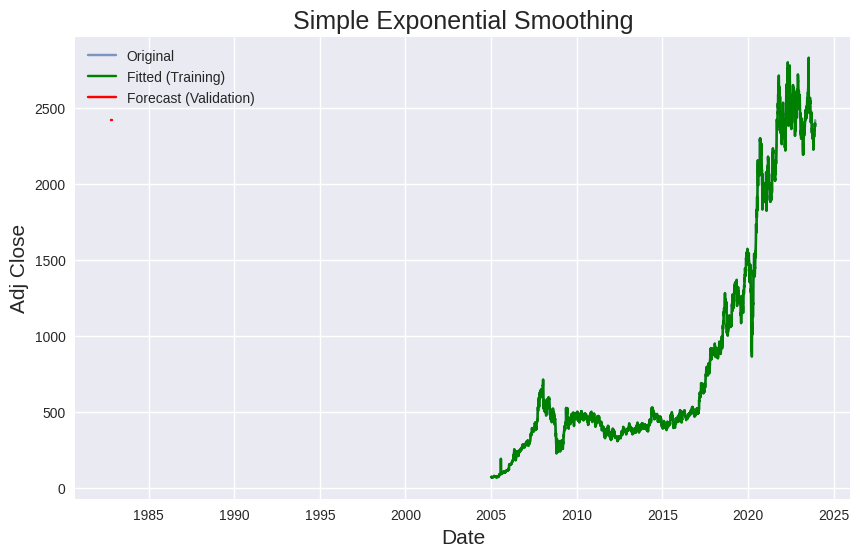

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming df is your DataFrame with 'Adj Close' as the time series data
y = df_orig['Adj Close']

# Fit Simple Exponential Smoothing model
model_ses = SimpleExpSmoothing(y)
fit_ses = model_ses.fit()

# Forecast future values
forecast_ses = fit_ses.forecast(steps=30)  # Adjust the number of steps as needed

# Plot original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original', alpha=0.7)
plt.plot(fit_ses.fittedvalues, label='Fitted (Training)', color='green')
plt.plot(forecast_ses, label='Forecast (Validation)', color='red')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


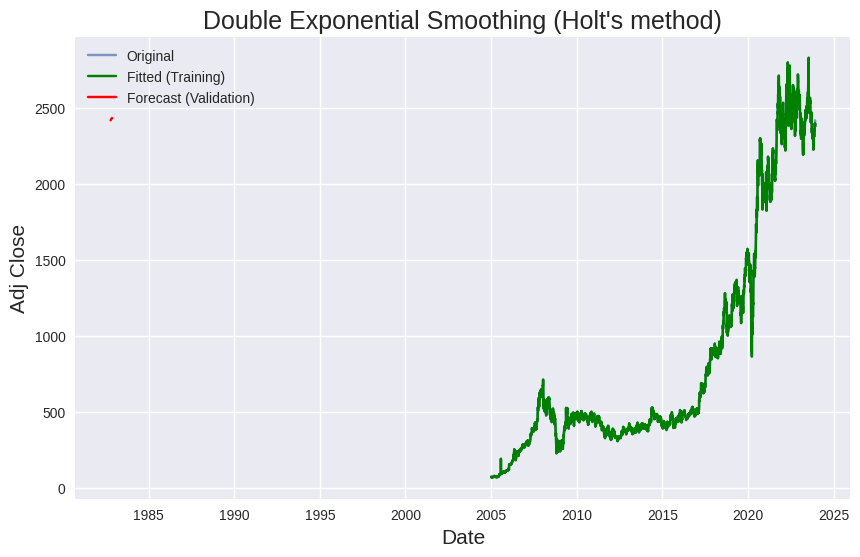

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Double Exponential Smoothing model (Holt's method)
model_holt = ExponentialSmoothing(y, trend='add')
fit_holt = model_holt.fit()

# Forecast future values
forecast_holt = fit_holt.forecast(steps=30)  # Adjust the number of steps as needed

# Plot original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original', alpha=0.7)
plt.plot(fit_holt.fittedvalues, label='Fitted (Training)', color='green')
plt.plot(forecast_holt, label='Forecast (Validation)', color='red')
plt.title("Double Exponential Smoothing (Holt's method)")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


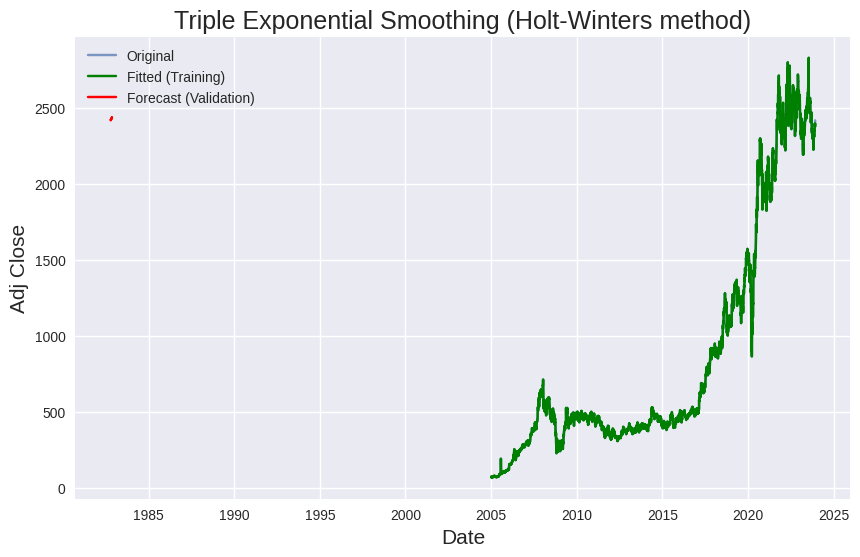

In [ ]:
# Fit Triple Exponential Smoothing model (Holt-Winters method)
model_hw = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12)
fit_hw = model_hw.fit()

# Forecast future values
forecast_hw = fit_hw.forecast(steps=30)  # Adjust the number of steps as needed

# Plot original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original', alpha=0.7)
plt.plot(fit_hw.fittedvalues, label='Fitted (Training)', color='green')
plt.plot(forecast_hw, label='Forecast (Validation)', color='red')
plt.title("Triple Exponential Smoothing (Holt-Winters method)")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

## Augmented Dicky Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

In [ ]:
adf_test(df_orig['Adj Close'])

Test Statistic             0.106445
p-value                    0.966498
# Lags                    32.000000
# Observations          4637.000000
Critical Value (1%)       -3.431761
Critical Value (5%)       -2.862164
Critical Value (10%)      -2.567102
dtype: float64
 Series is Non-Stationary


<Axes: xlabel='Date'>

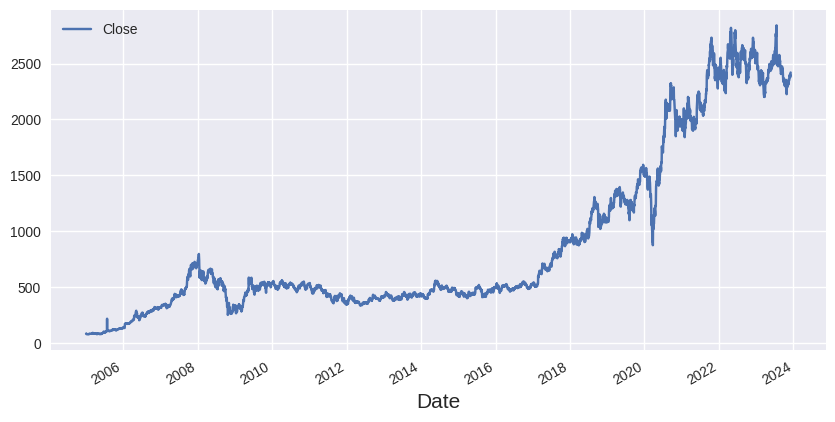

In [ ]:
reliance_stationarity=(df_orig[['Close']])
reliance_stationarity.plot()

# Differencing(to make the data stationary)

In [ ]:
# Make data stationary
df_differenced = df_orig.diff().dropna()
adf_test(df_differenced['Adj Close'])

Test Statistic         -1.252520e+01
p-value                 2.497593e-23
# Lags                  3.100000e+01
# Observations          4.637000e+03
Critical Value (1%)    -3.431761e+00
Critical Value (5%)    -2.862164e+00
Critical Value (10%)   -2.567102e+00
dtype: float64
 Series is Stationary


<Axes: xlabel='Date'>

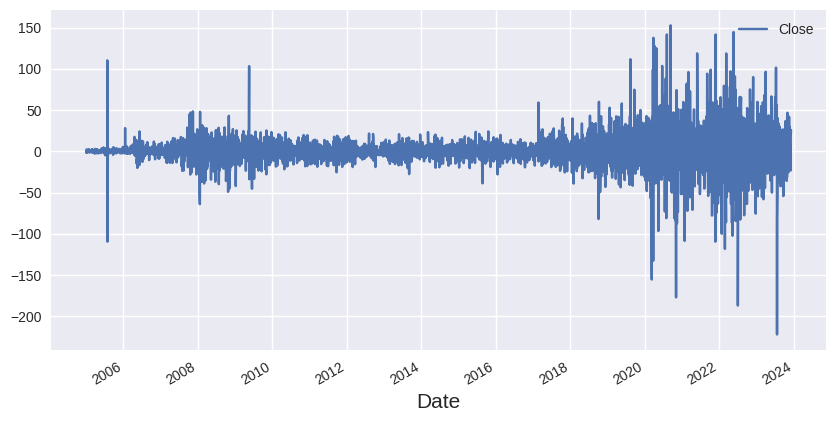

In [ ]:
reliance_stationarity=df_differenced[['Close']]
reliance_stationarity.plot()

# Data processing
## Extract by percentage and differences instead of absolute values

In [ ]:
df = df_orig.copy()
df['stick_height'] = (df['High'] - df['Low'])/df['Adj Close']
df['open_gap'] = (df['Open'] - df['Close'].shift(1))/df['Adj Close']
df['upper_stick'] = (df['High']-df[['Open','Close']].max(axis=1))/df['Adj Close']
df['lower_stick'] = (df[['Open','Close']].min(axis=1)-df['Low'])/df['Adj Close']
df['volume_change'] = df['Volume'].diff(1)/df['Volume'].shift(1)
df['price_change'] = df['Adj Close'].diff(1)/df['Adj Close'].shift(1)
df = df[1:]
df['volume_change'] = df['volume_change'].clip(lower=-0.6, upper=0.6)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,stick_height,open_gap,upper_stick,lower_stick,volume_change,price_change
Date,,,,,,,,,,,,
2005-01-04,85.099380,85.099380,81.942963,82.198265,70.468376,33984747,0.044792,0.013503,0.000000,0.003623,-0.234425,-0.023168
2005-01-05,81.385956,82.538666,79.861900,81.997124,70.295952,51895844,0.038079,-0.011556,0.007704,0.021681,0.527033,-0.002447
2005-01-06,81.695404,83.010574,80.805733,81.416901,69.798531,42447893,0.031589,-0.004323,0.018842,0.008756,-0.182056,-0.007076
2005-01-07,82.778488,84.743507,81.625778,83.900253,71.927513,49904274,0.043345,0.018930,0.011724,0.016026,0.175660,0.030502
2005-01-10,84.348961,84.774452,82.175056,82.646973,70.853073,34479667,0.036687,0.006333,0.006005,0.006660,-0.309084,-0.014938


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,stick_height,open_gap,upper_stick,lower_stick,volume_change,price_change
count,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4.669000e+03,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000
mean,888.071966,898.244354,877.058609,887.247792,859.800045,1.187151e+07,0.028256,0.001571,0.006865,0.006912,0.029346,0.001072
std,753.831449,760.849517,746.241277,753.234079,759.872561,1.195301e+07,0.020077,0.022022,0.007570,0.008138,0.345476,0.026431
min,78.152176,78.894859,75.815811,77.610634,66.535416,0.000000e+00,0.000000,-1.156211,0.000000,0.000000,-0.600000,-0.501506
25%,418.037415,423.287659,412.811951,417.121094,385.478912,5.724531e+06,0.016851,-0.002018,0.002854,0.002799,-0.235582,-0.009960
50%,508.182922,514.126587,501.830658,508.009583,475.275604,8.345649e+06,0.023021,0.001761,0.005209,0.004965,-0.008562,0.000514
75%,1219.440918,1231.328247,1201.758545,1218.004517,1196.257324,1.355859e+07,0.033006,0.005516,0.008909,0.008771,0.284146,0.011270
max,2856.149902,2856.149902,2797.000000,2841.850098,2831.846680,2.918015e+08,0.242204,0.575678,0.144415,0.220348,0.600000,1.018958


<Axes: xlabel='Date'>

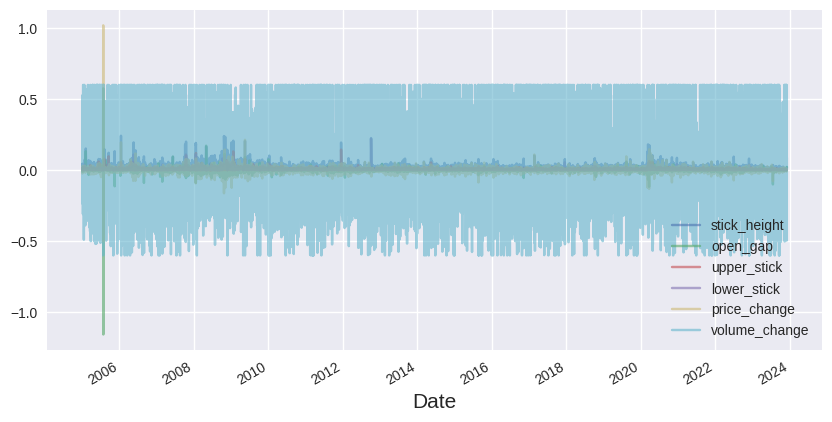

In [ ]:
train_cols = ['stick_height','open_gap','upper_stick','lower_stick','price_change','volume_change']
df[train_cols].plot(alpha=0.6)

<Axes: xlabel='Date'>

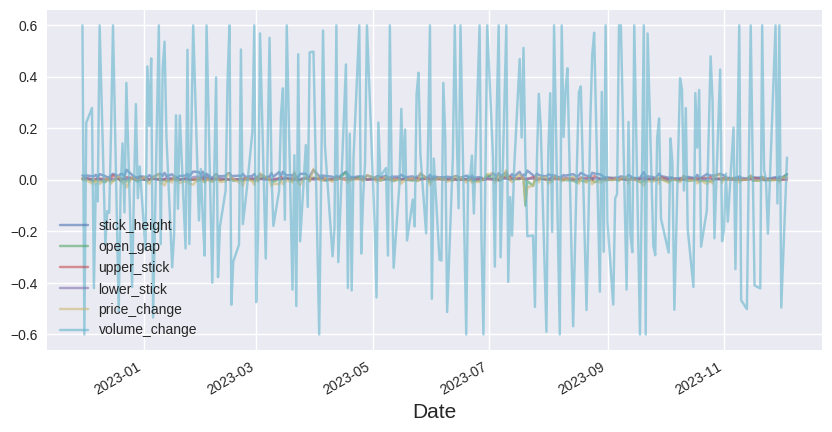

In [ ]:
df[-250:][train_cols].plot(alpha=0.6)

In [ ]:
adf_test(df['price_change'])

Test Statistic           -37.901850
p-value                    0.000000
# Lags                     3.000000
# Observations          4665.000000
Critical Value (1%)       -3.431753
Critical Value (5%)       -2.862160
Critical Value (10%)      -2.567100
dtype: float64
 Series is Stationary


## Train test split

In [ ]:
pred_idx = -30
df_train = df.copy()[:pred_idx]
df_val = df.copy()[pred_idx:]

## Build model using VAR and validate

### Build model

In [ ]:
model = VAR(df_train[train_cols])
model = model.fit(maxlags=20, ic='aic')
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Dec, 2023
Time:                     17:45:10
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -45.9791
Nobs:                     4632.00    HQIC:                  -46.2116
Log likelihood:           68141.3    FPE:                7.51160e-21
AIC:                     -46.3378    Det(Omega_mle):     7.10647e-21
--------------------------------------------------------------------
Results for equation stick_height
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.005422         0.000558            9.713           0.000
L1.stick_height          0.186939         0.018198           10.273           0.000
L1.open_gap             -0.033152        

### Forecast with validation set

In [ ]:
lag_order = model.k_ar
df_for_pred = df_train[-lag_order:]
forecast = model.forecast(df_for_pred[train_cols].values,np.abs(pred_idx))

In [ ]:
def plot_time(y_train, y_pred, start_date=None, y_val=None):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    x_train = np.arange(-len(y_train),0,1)
    x_pred = np.arange(1,len(y_pred)+1,1)
    plt.plot(x_train, y_train, color='black', linewidth=1.5, label='Historical price')
    plt.plot(x_pred, y_pred, color='red',label='Prediction',alpha=0.8)
    try:
        x_val = np.arange(1,len(y_val)+1,1)
        plt.plot(x_val, y_val, color='blue',label='Val',alpha=0.6)
    except:
        pass
    plt.xlabel('Days')
    plt.ylabel('Price')
    fig.canvas.draw()

    # Label start date
    labels = [item.get_text() for item in ax.get_xticklabels()]

    if start_date != None:
        for i in range(len(labels)):
            if labels[i] == '0':
                labels[i] = start_date
    ax.set_xticklabels(labels)
    plt.legend(loc='best')

In [ ]:
y_train = df_train[-200:]['price_change']
y_change_pred = forecast[:,4]
start_date = df_train.index[-1]
y_val = df_val[:]['price_change']

In [ ]:
def make_forward_pred(y_start, change_rate):
    outlist = []
    y_last = y_start
    for rate in change_rate:
        y_cur = y_last*(1+rate)
        outlist.append(y_cur)
        y_last = y_cur
    return outlist

In [ ]:
y_pred = make_forward_pred(df_train['Adj Close'].values[-1], y_change_pred)

In [ ]:
y_train = df_train[-200:]['Adj Close']
start_date = df_train.index[-1]
y_val = df_val[:]['Adj Close']

## Full prediction

In [ ]:
model = VAR(df[train_cols])
model = model.fit(maxlags=20, ic='aic')
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Dec, 2023
Time:                     17:45:12
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -46.0088
Nobs:                     4662.00    HQIC:                  -46.2401
Log likelihood:           68645.7    FPE:                7.30579e-21
AIC:                     -46.3656    Det(Omega_mle):     6.91422e-21
--------------------------------------------------------------------
Results for equation stick_height
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.005356         0.000553            9.689           0.000
L1.stick_height          0.187691         0.018134           10.350           0.000
L1.open_gap             -0.033359        

In [ ]:
lag_order = model.k_ar
df_for_pred = df[-lag_order:]
forecast = model.forecast(df_for_pred[train_cols].values,np.abs(pred_idx))

In [ ]:
y_change_pred = forecast[:,4]
y_pred = make_forward_pred(df['Adj Close'].values[-1], y_change_pred)

<ipython-input-41-c8624404ee07>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Price pred using VAR')

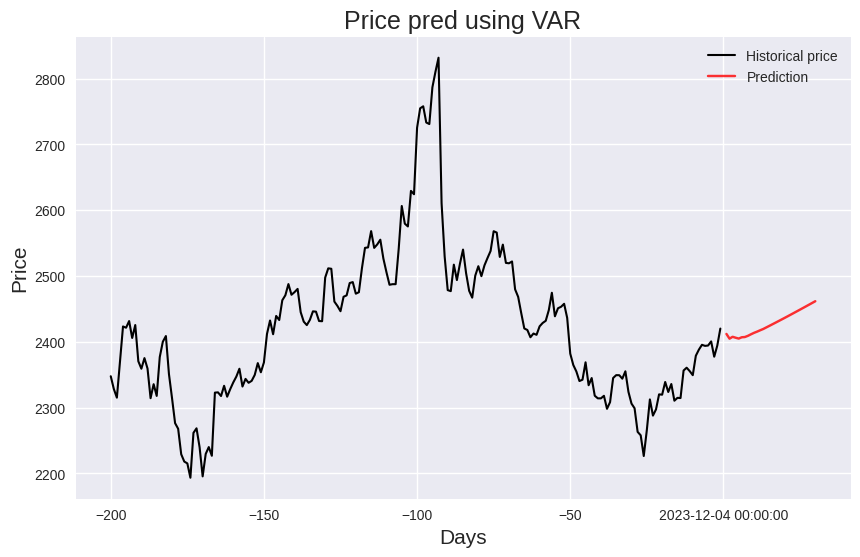

In [ ]:
y_train = df[-200:]['Adj Close']
start_date = df.index[-1]
plot_time(y_train, y_pred, start_date)
plt.title("Price pred using VAR")

# EVALUATION MERTICS FOR VAR MODEL

In [ ]:
# Assuming forecast_var is the predictions from your VAR model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate VAR model
mae_var = mean_absolute_error(y_val, y_change_pred )
mse_var = mean_squared_error(y_val, y_change_pred )

# Calculate RMSE
rmse_var = np.sqrt(mse_var)

print(mae_var)
print(mse_var)
print(rmse_var)

2335.3577405421247
5456228.4005488595
2335.857101911172


# ARIMA MODEL

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00


#AUGMENTED DICKY FULLER TEST

In [ ]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [ ]:
dicky_fuller_test(df['Adj Close'])

ADF Statistic: 0.105993
p-value: 0.966468
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=df.index,y=df.Close)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='closing price over time')
fig.show()

#DIFFRENCING

In [ ]:
df['Close_diff']=df['Close']-df['Close'].shift(1)

In [ ]:
fig = go.Figure([go.Scatter(x=df.index,y=df.Close_diff)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='difference close over time ')
fig.show()

#BUILDING THE MODEL

In [ ]:
import pmdarima as pm

# Assuming df_train is your training dataset with 'Adj Close' as the target variable
y_train = df_train['Adj Close']

# Fit an auto_arima model
model_auto_arima = pm.auto_arima(y_train, seasonal=True, m=12, suppress_warnings=True)

# Display the summary of the best model
print(model_auto_arima.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 4639
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood              -20422.775
Date:                             Mon, 04 Dec 2023   AIC                          40859.550
Time:                                     17:52:38   BIC                          40904.644
Sample:                                          0   HQIC                         40875.415
                                            - 4639                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8192      0.524      1.562      0.118      -0.208       1.847
ar.L1          0.1780      

#PRICE PREDICTION USING AUTO-ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



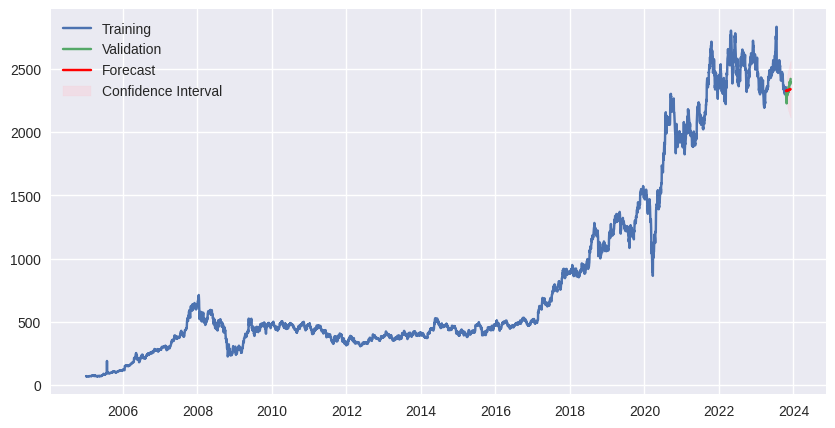

In [ ]:
# Forecast using the trained auto_arima model
forecast_auto_arima, conf_int = model_auto_arima.predict(n_periods=len(df_val), return_conf_int=True)

# Plot observed vs. forecast
plt.plot(df_train.index, y_train, label='Training')
plt.plot(df_val.index, df_val['Adj Close'], label='Validation')
plt.plot(df_val.index, forecast_auto_arima, label='Forecast', color='red')
plt.fill_between(df_val.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


# Evaluation Metrics for AUTO-ARIMA

In [ ]:
# Assuming forecast_var is the predictions from your VAR model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate VAR model
mae_arima = mean_absolute_error(y_val, forecast_auto_arima)
mse_arima = mean_squared_error(y_val, forecast_auto_arima)

# Calculate RMSE
rmse_arima = np.sqrt(mse_arima)
print(mae_arima)
print(mse_arima)
print(rmse_arima)

37.36126751387975
1992.62899243238
44.63887310889893


#SARIMA MODEL

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import datetime
import seaborn as sns

from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product

# Library for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 18

}
rcParams.update(params)
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi'] = 100

from mplfinance.original_flavor import candlestick2_ohlc
import mplfinance as mpf

<ipython-input-62-25b4decf4a60>:20: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



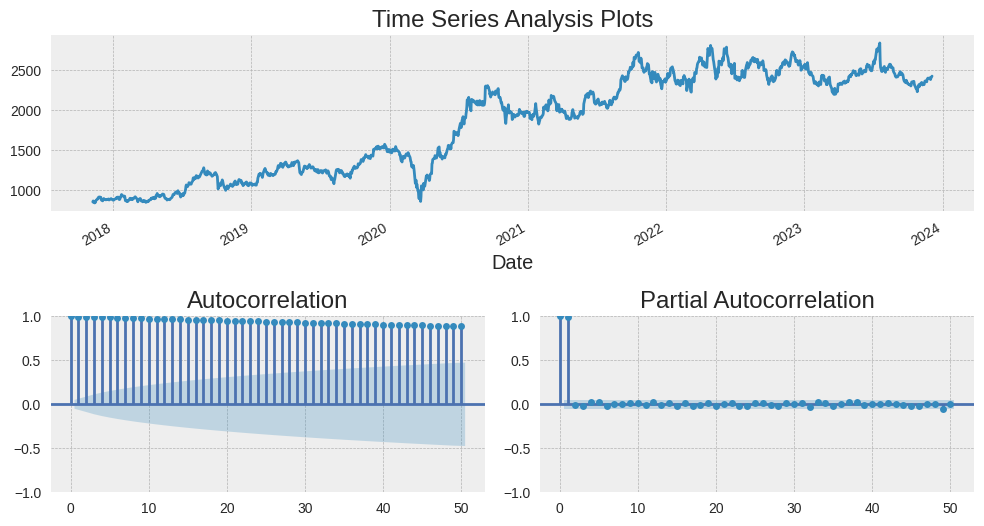

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

# Usage
tsplot(df['Adj Close'][-1500:], lags=50)
plt.show()


#DIFFRENCING(to make the data stationary)

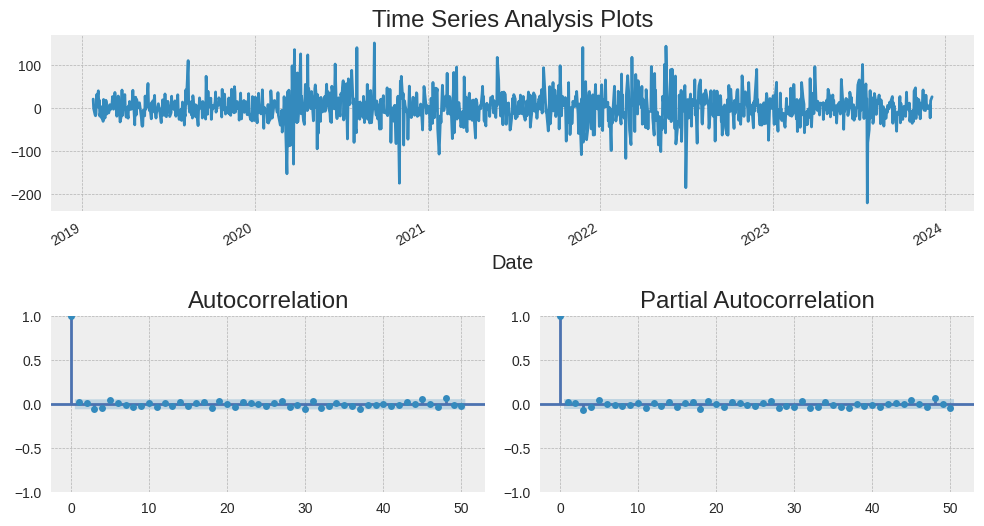

In [ ]:
price_diff = df['Adj Close']- df['Adj Close'].shift(1)
tsplot(price_diff[-1200:],lags=50)

#Seasonal Decompose

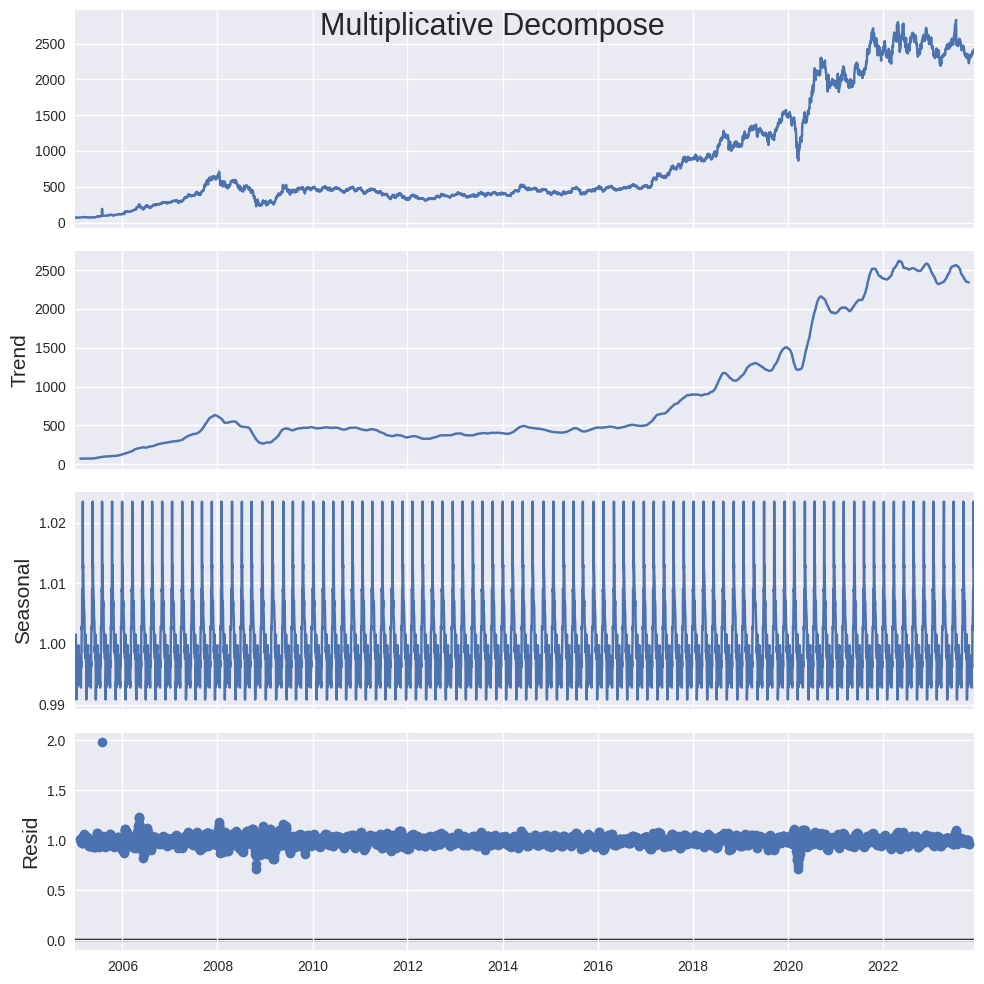

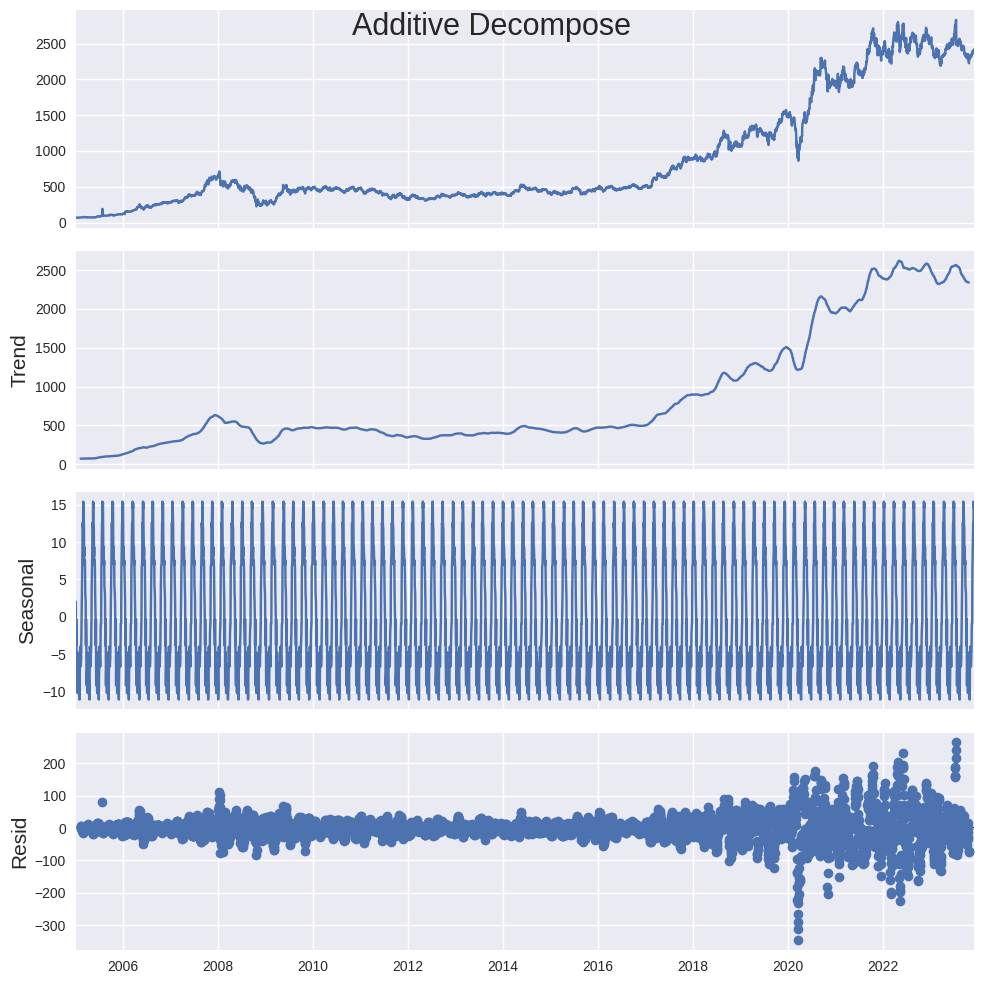

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df['Adj Close'].to_frame()


# Multiplicative Decomposition
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
p = 9 # lag order
d = 1 # integration order
q = 9 # moving average order

P = 1 # seasonal components for PACF plot
Q = 1 # seasonal components for ACF plot
D = 1 # apply seasonal difference
s = 22 # seasonal is 1 month

In [ ]:
data = df['Adj Close'][-1500:pred_idx]

In [ ]:
model=sm.tsa.statespace.SARIMAX(data, order=(p, d, q),
                                    seasonal_order=(P, D, Q, s)).fit(disp=-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                 1470
Model:             SARIMAX(9, 1, 9)x(1, 1, [1], 22)   Log Likelihood               -7130.308
Date:                              Mon, 04 Dec 2023   AIC                          14302.616
Time:                                      17:58:16   BIC                          14413.438
Sample:                                           0   HQIC                         14343.976
                                             - 1470                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6743      2.083      0.324      0.746      -3.409       4.757
ar.L2         -0.3041      3.002     -0.101      0.919      -6.188       5.580
ar.L3          0.7113      2.213      0.321      0.748      -3.627       5.049
ar.L4         -0.7564      2.542     -0.298      0.766      -5.739       4.226
ar.L5          0.2709      3.148      0.086      0.931      -5.898       6.440
ar.L6         -0.5572      2.393     -0.233      0.816      -5.248       4.133
ar.L7          0.6217      2.231      0.279      0.780      -3.750       4.994
ar.L8          0.1356      2.645      0.051      0.959      -5.048       5.319
ar.L9         -0.1642      1.404     -0.117      0.907      -2.915       2.587
ma.L1         -0.6311      2.084     -0.303      0.762      -4.716       3.454
ma.L2          0.3012      2.922      0.103      0.918      -5.426       6.029
ma.L3         -0.7696      2.135     -0.360      0.719      -4.954       3.415
ma.L4          0.7473      2.621      0.285      0.776      -4.389       5.884
ma.L5         -0.2484      3.198     -0.078      0.938      -6.515       6.019
ma.L6          0.6168      2.343      0.263      0.792      -3.975       5.209
ma.L7         -0.6723      2.300     -0.292      0.770      -5.181       3.836
ma.L8         -0.1515      2.815     -0.054      0.957      -5.668       5.365
ma.L9          0.1560      1.479      0.106      0.916      -2.743       3.055
ar.S.L22       0.0359      0.027      1.310      0.190      -0.018       0.090
ma.S.L22      -0.9995      0.576     -1.736      0.083      -2.128       0.129
sigma2      1026.8088    579.916      1.771      0.077    -109.806    2163.423
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1208.38
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Testing the model on validation set

In [ ]:
forecast = model.predict(start = len(data), end=len(data)+np.abs(pred_idx))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
y_train = df[-250:pred_idx]['Adj Close']
y_pred = forecast.values
y_val = df[pred_idx:]['Adj Close']
start_date = df.index[pred_idx]

<ipython-input-41-c8624404ee07>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Price prediction\xa0using\xa0SARIMA')

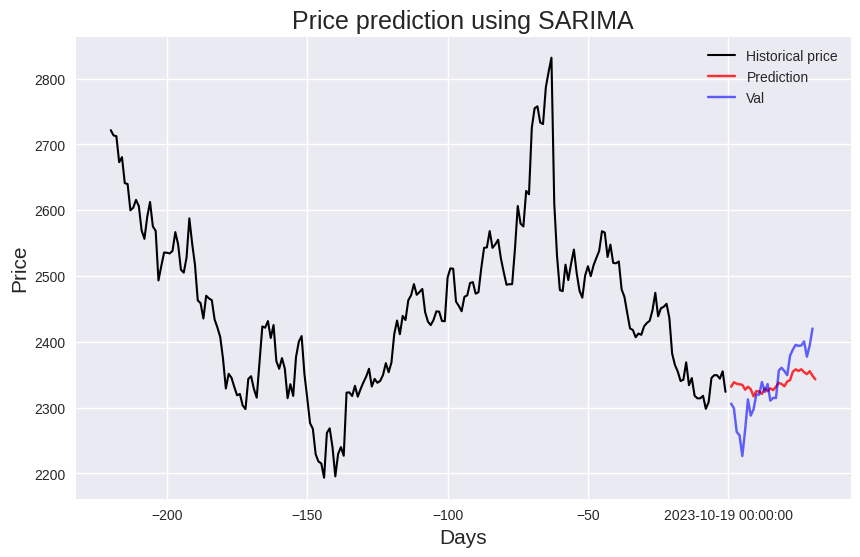

In [ ]:
plot_time(y_train, y_pred, start_date, y_val)
plt.title('Price prediction using SARIMA')

#EVALUATION METRICS FOR SARIMA

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming df_val is your validation dataset with 'Adj Close' as the actual values
y_actual = df_val['Adj Close']

# Forecast using the trained SARIMA model
forecast_sarima = model.get_forecast(steps=len(df_val)).predicted_mean

# Calculate metrics
mae_sarima = mean_absolute_error(y_actual, forecast_sarima)
mse_sarima = mean_squared_error(y_actual, forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)

print("MAE:", mae_sarima)
print("MSE:", mse_sarima)
print("RMSE:",rmse_sarima)

MAE: 33.299072375248244
MSE: 1684.049131786627
RMSE: 41.03716768719092


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



#FUTURE PREDICTIONS

In [ ]:
data = df['Adj Close'][-1500:]
model=sm.tsa.statespace.SARIMAX(data, order=(p, d, q),
                                    seasonal_order=(P, D, Q, s)).fit(disp=-1)
forecast = model.predict(start = len(data), end=len(data)+np.abs(pred_idx))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/d

In [ ]:
y_train = df[-200:]['Adj Close']
y_pred = forecast.values
start_date = df.index[-1]

<ipython-input-41-c8624404ee07>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Future price prediction\xa0using\xa0SARIMA')

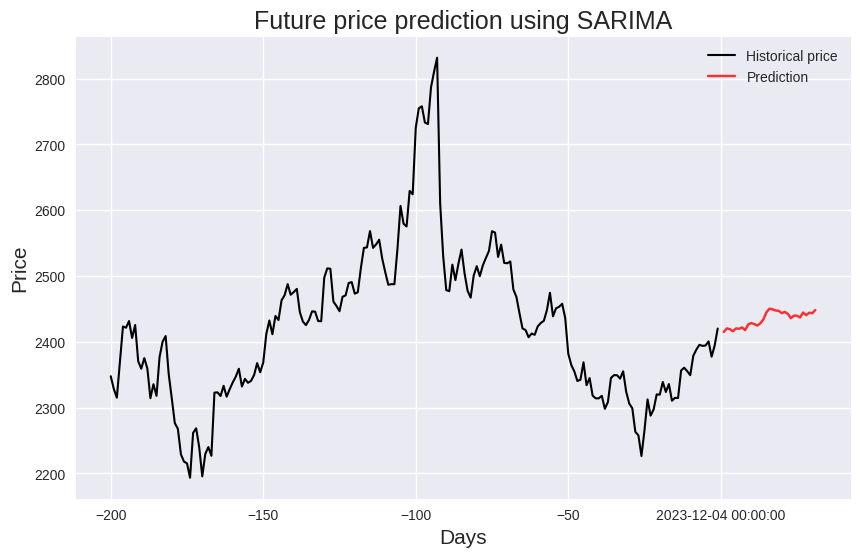

In [ ]:
plot_time(y_train, y_pred, start_date)
plt.title('Future price prediction using SARIMA')